In [3]:
import pandas as pd
import numpy as  np

In [5]:
df = pd.read_csv("fatalities_isr_pse_conflict_2000_to_2023.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [11]:
df.head(3)

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...


In [15]:
df.shape

(11124, 16)

In [39]:
citizenship_counts = df['citizenship'].value_counts()
event_location_region = df['event_location_region'].value_counts()
hostilities_counts = df[df['took_part_in_the_hostilities']=='Yes']['citizenship'].value_counts()
no_hostilities_counts = df[df['took_part_in_the_hostilities']=='No']['citizenship'].value_counts()


<Axes: xlabel='type_of_injury'>

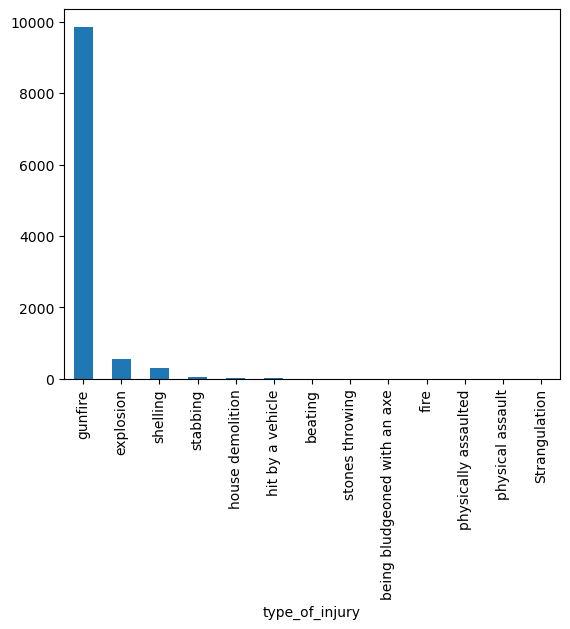

In [47]:
df['type_of_injury'].value_counts().plot(kind="bar")

In [51]:
df['gender'].value_counts()

gender
M    9681
F    1423
Name: count, dtype: int64

<Axes: xlabel='gender'>

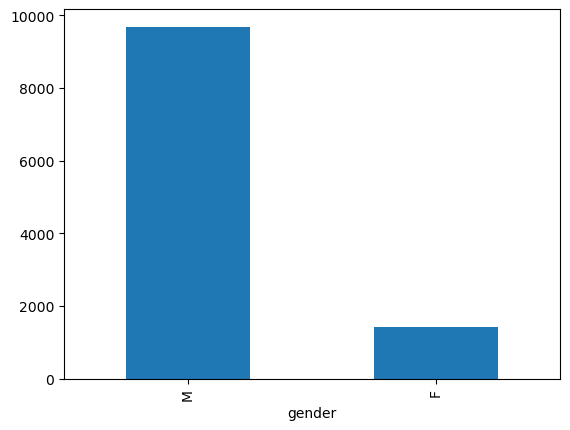

In [49]:
df['gender'].value_counts().plot(kind='bar')

In [53]:
df['age'].describe()

count    10995.000000
mean        26.745703
std         13.780548
min          1.000000
25%         19.000000
50%         23.000000
75%         31.000000
max        112.000000
Name: age, dtype: float64

<Axes: xlabel='event_location_region'>

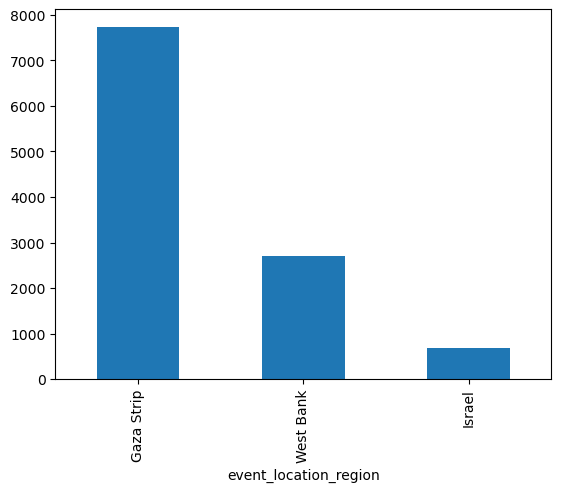

In [59]:
df['event_location_region'].value_counts().plot(kind='bar')

In [63]:
df.groupby('event_location_region')['place_of_residence'].nunique()

event_location_region
Gaza Strip    145
Israel        178
West Bank     403
Name: place_of_residence, dtype: int64

<Axes: ylabel='place_of_residence'>

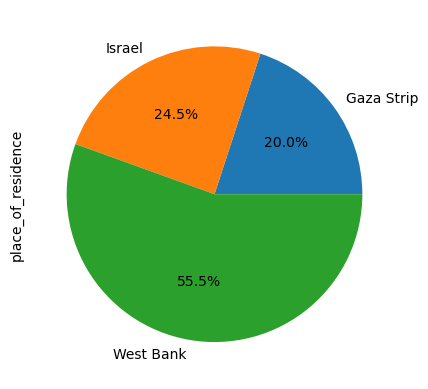

In [65]:
df.groupby('event_location_region')['place_of_residence'].nunique().plot(kind='pie',autopct='%1.1f%%')

In [67]:
df.groupby('event_location_region')['age'].mean()

event_location_region
Gaza Strip    26.020224
Israel        36.286776
West Bank     26.421746
Name: age, dtype: float64

<Axes: ylabel='count'>

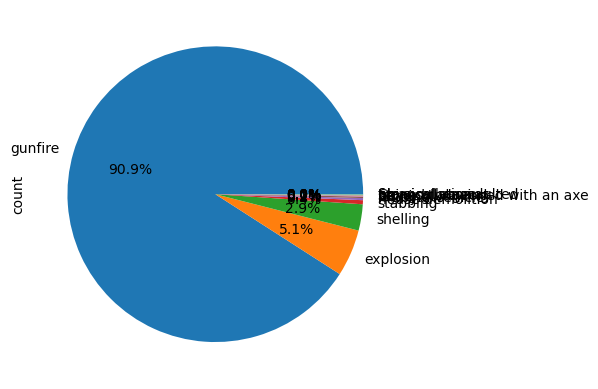

In [69]:
df['type_of_injury'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [73]:
df.groupby('citizenship').size().reset_index(name='incident_count')

,citizenship,incident_count
0,American,1
1,Israeli,1029
2,Jordanian,2
3,Palestinian,10092


In [77]:
df.groupby('gender').size().reset_index(name='incident_count')

,gender,incident_count
0,F,1423
1,M,9681


In [87]:
subset = df[(df['event_location_region']=='West Bank') & (df['type_of_injury']=='gunfire')]

In [89]:
import seaborn as sns
df['date_of_event'] = pd.to_datetime(df['date_of_event'])
df['year'] = df['date_of_event'].dt.year
df['month'] = df['date_of_event'].dt.month_name()
time_events = df.groupby(['year','month']).size().reset_index(name='incident_count')
time_events['year_month'] = time_events['month'] + ' ' + time_events['year'].astype(str)
time_events

,year,month,incident_count,year_month
0,2000,December,10,December 2000
1,2000,November,17,November 2000
2,2000,October,8,October 2000
3,2001,April,4,April 2001
4,2001,August,26,August 2001
...,...,...,...,...
262,2023,July,25,July 2023
263,2023,June,24,June 2023
264,2023,March,25,March 2023
265,2023,May,53,May 2023


In [93]:
df['date_of_event'] = pd.to_datetime(df['date_of_event'])

In [95]:
df['date_of_event'].dt.year

0        2023
1        2023
2        2023
3        2023
4        2023
         ... 
11119    2000
11120    2000
11121    2000
11122    2000
11123    2000
Name: date_of_event, Length: 11124, dtype: int32

In [97]:
time_events['year_month'] = time_events['month'] + ' ' + time_events['year'].astype(str)
time_events

,year,month,incident_count,year_month
0,2000,December,10,December 2000
1,2000,November,17,November 2000
2,2000,October,8,October 2000
3,2001,April,4,April 2001
4,2001,August,26,August 2001
...,...,...,...,...
262,2023,July,25,July 2023
263,2023,June,24,June 2023
264,2023,March,25,March 2023
265,2023,May,53,May 2023
